In [1]:
import pylab
import mlflow

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
import math

Create Experiment

In [61]:
experiment_name = 'best_subset_selection_1'

dict_values = {
    'mse':0,
    'r2_adj':0,
    'rmse':0
}


def load_create_experiment():
    if mlflow.get_experiment_by_name(experiment_name):
        return mlflow.get_experiment_by_name(experiment_name)
    return mlflow.create_experiment(experiment_name)
    
current_experiment = load_create_experiment()

Filtering Data

In [63]:
#Start run 

columns_to_drop = ['NOX','AGE','PTRATIO']

df_boston = datasets.load_boston()

mlflow.log_param('drop_columns',columns_to_drop)

y = pd.DataFrame(df_boston.target, columns=['price'])
x = pd.DataFrame(df_boston.data, columns=df_boston.feature_names)
x = x.drop(columns=columns_to_drop)


df_experiment = pd.concat((y,x),axis=1)
df_experiment = df_experiment[df_experiment['price'] <= 35]
df_experiment.shape
mlflow.start_run()




c:\ProgramData\Anaconda3\envs\datamining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

Exception: Run with UUID 0955d52f61144b13aeb6a27fd34208e7 is already active. To start a new run, first end the current run with mlflow.end_run(). To start a nested run, call start_run with nested=True

Stadarize Data

In [64]:
#Normalizacion de datos
y_filtered = pd.DataFrame(df_experiment['price'],columns=['price'])
print(df_experiment.columns)
x_filtered = pd.DataFrame(df_experiment.drop(columns='price'))


scaler = StandardScaler()
x_scale = scaler.fit_transform(x_filtered)


Index(['price', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'B',
       'LSTAT'],
      dtype='object')


Train and Summary

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y_filtered, test_size=0.3, random_state=42)
ml = sm.OLS(y_train, sm.add_constant( x_train))
ml_results = ml.fit()

In [66]:
print(ml_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     78.03
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           1.95e-78
Time:                        17:56:14   Log-Likelihood:                -845.62
No. Observations:                 320   AIC:                             1713.
Df Residuals:                     309   BIC:                             1755.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4422      0.194    105.339      0.0

In [67]:
# Valores Ajustados
fitted_values = ml_results.fittedvalues

# Valores residuales
residuals = ml_results.resid

#residuales estandarizados
lm_resid_stand = ml_results.get_influence().resid_studentized_internal

#raiz de los residuales normalizados absolutos
lm_resid_norm_abs_sqrt = np.sqrt(np.abs(lm_resid_stand))

#residuales absolutos
lm_resid_abs = np.abs(residuals)

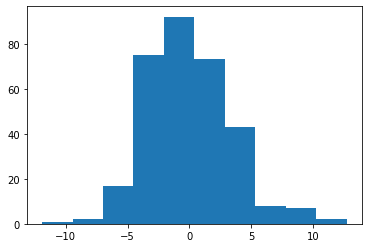

In [68]:
# Residuales
plt.hist(ml_results.resid)
plt.show()

In [69]:
y_pred = ml_results.predict(sm.add_constant(x_test))

In [70]:
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

Mean squared error: 8.90


Save Results

In [ ]:
from math import sqrt

dict_values = {
    'mse': mse,
    'r2_adj': ml_results.rsquared_adj,
    'rmse':sqrt(mse),
    'PriceValueTruncDown' : outlierValuePriceDown,
    'PriceValueTruncUp': outlierValuePriceUp
}

mlflow.set_tag('Normalization Type', normalizationType)
mlflow.set_tag('Summary',summary)


mlflow.log_metrics(dict_values)

### tipo de algoritmo
### modelo
### graficos
### databriks

End Run

In [ ]:
mlflow.end_run()